In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.kaggle.com/datasets/nolanbconaway/pitchfork-data за упражнение за merdge и работа с данни

In [25]:
rew = pd.read_csv("02.Data-Tidying-and-Cleaning-Materials/pew.csv")

In [26]:
rew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [27]:
rew_tidy = rew.melt(id_vars=["religion"], var_name = "income", value_name = "frequence") # melt обединява редове в колони

In [6]:
pd.pi() # обратна операция на melt, пренарежда колони

AttributeError: module 'pandas' has no attribute 'pi'

In [28]:
rew_tidy

,religion,income,frequence
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [29]:
rew.columns, rew_tidy.columns

(Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
        '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
       dtype='object'),
 Index(['religion', 'income', 'frequence'], dtype='object'))

In [30]:
rew_tidy

,religion,income,frequence
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [31]:
rew_tidy.dtypes

religion     object
income       object
frequence     int64
dtype: object

In [32]:
rew_tidy.religion = rew_tidy.religion.astype("category")
rew_tidy.income = rew_tidy.religion.astype("category") # промяна на типа данни в колоната


In [33]:
rew_tidy.dtypes

religion     category
income       category
frequence       int64
dtype: object

In [ ]:
tb = pd.read_csv("02.Data-Tidying-and-Cleaning-Materials/tb.csv")

In [ ]:
tb

NaN индикатор за стойност която липсва, означава че или че е забравено да се напише тази стойност или че тези данни ги няма или невалидна операция, има начи за работа с липсващи данни. В pd.read(.., na_values = []) има параметър na_values конкретни стойности се указват директно

In [ ]:
tb.shape

In [ ]:
tb.dtypes # NaN са валитни float стойности

In [ ]:
tb[(tb.year == 1989) & (tb.iso2 == "AD")].values # това е начин за филтриране

In [ ]:
tb.describe().T # в тези статистики NaN не участва

In [ ]:
tb_tidy = tb.melt(id_vars = ["iso2", "year"], var_name = "sex_and_age", value_name = "cases") # id_vars - указваме кои колони да запазим

In [ ]:
tb_tidy

In [ ]:
tb_tidy.head()

In [ ]:
tb_tidy.sex_and_age.str.slice(0, 1).unique() # str - дава достъп до операции за работа със стрингове, а dt - с дати

In [ ]:
tb_tidy.sex_and_age.str.slice(1).unique()

In [ ]:
tb_tidy["gender"] = tb_tidy.sex_and_age.str.slice(0, 1) # създаване на нова колона

In [ ]:
tb_tidy["age_group"] = tb_tidy.sex_and_age.str.slice(1) # създаване на нова колона

In [ ]:
tb_tidy = tb_tidy.drop(columns = ["sex_and_age"]) # премахване на колона

In [ ]:
tb_tidy

In [ ]:
tb_tidy.describe().T

In [ ]:
tb_tidy_no_missing = tb_tidy.dropna() # dropna премахва всички NaN

In [ ]:
tb_tidy_no_missing

In [ ]:
tb_tidy_no_missing.cases.mean()

In [ ]:
tb_tidy_no_missing[tb_tidy_no_missing.iso2 == "BG"] # филтриране

In [ ]:
tb_tidy_no_missing[tb_tidy_no_missing.iso2 == "BG"].cases.mean # средено аритметично при филтър

In [ ]:
tb_tidy_no_missing.age_group.str.len().value_counts() # groupBy на колоната age_group по дължина на стринга в клиетките

In [ ]:
tb_tidy_no_missing.age_group.str.slice(0, 2) # slice отрязва стринга в показания диапазон

In [ ]:
tb_tidy_no_missing.age_group.apply(lambda x: x[0]) # apply е начин да се проложи функция върху всеки един ред ако се подаде таблица или ако се подаде колона - за всяка една стойност от нея

In [ ]:
def proceses_age_group(age_group):
    ages = {"04": "0-4", "65": "65+", "u" : "unknown"}
    if age_group in ages:
        return ages[age_group]
    else:
        # Put a dash before the last two digits
        return f"{age_group[:-2]}-{age_group[-2:]}"

In [ ]:
tb_tidy_no_missing.age_group = tb_tidy_no_missing.age_group.apply(proceses_age_group) # променяме age_group

In [ ]:
tb_tidy_no_missing.age_group.unique()

In [ ]:
tb_tidy_no_missing

In [ ]:
tb_tidy_no_missing.gender = tb_tidy_no_missing.gender.astype("category")
tb_tidy_no_missing.age_group = tb_tidy_no_missing.age_group.astype("category") # форматиране като тип категория

In [ ]:
tb_tidy_no_missing

In [ ]:
tb_tidy_no_missing = tb_tidy_no_missing[["iso2", "year", "gender", "age_group", "cases"]] # пренареждане на колонте

In [ ]:
tb_tidy_no_missing = tb_tidy_no_missing.sort_values(["iso2", "year"]) # сортиране индексите се разбъркват

In [ ]:
tb_tidy_no_missing

In [ ]:
tb_tidy_no_missing = tb_tidy_no_missing.reset_index(drop = True) # създава на нов индекс и премахване на стария

In [ ]:
tb_tidy_no_missing.cases = tb_tidy_no_missing.cases.astype(int) # променяне типа данни на cases

In [ ]:
tb_tidy_no_missing

In [ ]:
tb_tidy_no_missing.to_csv("02.Data-Tidying-and-Cleaning-Materials/tb_tidy.csv") # записване на данните във файл

In [ ]:
weather_data = pd.read_csv("02.Data-Tidying-and-Cleaning-Materials/weather.csv")

In [ ]:
weather_data

In [ ]:
weather_data_tidy = weather_data.melt(id_vars = ["id", "year", "month", "element"], var_name = "day")

In [ ]:
weather_data_tidy

In [ ]:
weather_data_tidy.day.unique()

In [ ]:
weather_data_tidy.day = weather_data_tidy.day.str.slice(1).astype(int)

In [ ]:
weather_data_tidy

In [ ]:
weather_data_tidy = weather_data_tidy.dropna()

In [ ]:
weather_data_tidy

In [ ]:
weather_data_tidy = weather_data_tidy.pivot_table(
    index = ["id", "year", "month", "day"]
    , columns = "element"
    , values = "value") 
# създаване на колони от редове в индекс са колоните, които запазваме, в columns колоните които ще разделяме и value стойностите

In [ ]:
weather_data_tidy = weather_data_tidy.reset_index()

In [ ]:
weather_data_tidy["date"] = weather_data_tidy.apply(lambda x: f"{x['year']}-{x['month']:02}-{x['day']:02}", axis = 1)

In [ ]:
weather_data_tidy

In [ ]:
weather_data_tidy = weather_data_tidy.drop(columns = ["year", "month", "day"])

In [ ]:
weather_data_tidy.date = pd.to_datetime(weather_data_tidy["date"])

In [ ]:
weather_data_tidy.dtypes

In [8]:
billboard_data = pd.read_csv("02.Data-Tidying-and-Cleaning-Materials/billboard.csv")

In [9]:
billboard_data

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
billboard_data[billboard_data.wk65.notna()] # notna() показва само стойностите с данни

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
62,2000,Creed,Higher,5:16,1999-09-11,81,77.0,73.0,63.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
billboard_data[billboard_data.columns[-15:]].describe().T

,count,mean,std,min,25%,50%,75%,max
wk62,2.0,44.5,3.535534,42.0,43.25,44.5,45.75,47.0
wk63,2.0,47.5,3.535534,45.0,46.25,47.5,48.75,50.0
wk64,2.0,50.0,0.000000,50.0,50.00,50.0,50.00,50.0
wk65,1.0,49.0,NaN,49.0,49.00,49.0,49.00,49.0
wk66,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk67,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk68,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk69,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk70,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk71,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
billboard_data = billboard_data.melt(id_vars = ["year", "artist", "track", "time", "date.entered"], var_name = "week", value_name ="position")

In [13]:
billboard_data = billboard_data.dropna()

In [14]:
billboard_data

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,wk63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,wk63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,wk64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,wk64,50.0


In [15]:
billboard_data.week = billboard_data.week.str.slice(2).astype(int)

In [16]:
billboard_data.dtypes

year              int64
artist           object
track            object
time             object
date.entered     object
week              int32
position        float64
dtype: object

In [17]:
billboard_data.position = billboard_data.position.astype(int)

In [18]:
billboard_data.dtypes

year             int64
artist          object
track           object
time            object
date.entered    object
week             int32
position         int32
dtype: object

In [19]:
billboard_data["date.entered"] = pd.to_datetime(billboard_data["date.entered"])

In [20]:
billboard_data.dtypes

year                     int64
artist                  object
track                   object
time                    object
date.entered    datetime64[ns]
week                     int32
position                 int32
dtype: object

In [21]:
pd.Timedelta(1, "w") # функция за добавяне на време към datetime format

Timedelta('7 days 00:00:00')

In [23]:
intervals = billboard_data.week.apply(lambda x: pd.Timedelta(x - 1, "w"))

In [24]:
billboard_data["date"] = billboard_data["date.entered"] + intervals

In [25]:
billboard_data

,year,artist,track,time,date.entered,week,position,date
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57,2000-04-15
...,...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50,2000-11-18
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45,2000-08-12
20033,2000,Creed,Higher,5:16,1999-09-11,64,50,2000-11-25
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50,2000-08-19


In [26]:
billboard_data[billboard_data.track == "Higher"] # филтер по колона track

,year,artist,track,time,date.entered,week,position,date
62,2000,Creed,Higher,5:16,1999-09-11,1,81,1999-09-11
379,2000,Creed,Higher,5:16,1999-09-11,2,77,1999-09-18
696,2000,Creed,Higher,5:16,1999-09-11,3,73,1999-09-25
1013,2000,Creed,Higher,5:16,1999-09-11,4,63,1999-10-02
1330,2000,Creed,Higher,5:16,1999-09-11,5,61,1999-10-09
1647,2000,Creed,Higher,5:16,1999-09-11,6,58,1999-10-16
1964,2000,Creed,Higher,5:16,1999-09-11,7,56,1999-10-23
2281,2000,Creed,Higher,5:16,1999-09-11,8,52,1999-10-30
2598,2000,Creed,Higher,5:16,1999-09-11,9,56,1999-11-06
2915,2000,Creed,Higher,5:16,1999-09-11,10,57,1999-11-13


In [28]:
billboard_data = billboard_data.drop(columns = ["date.entered", "week"])

In [29]:
billboard_data

,year,artist,track,time,position,date
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,87,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,91,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,81,2000-04-08
3,2000,3 Doors Down,Loser,4:24,76,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,57,2000-04-15
...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,50,2000-11-18
19833,2000,Lonestar,Amazed,4:25,45,2000-08-12
20033,2000,Creed,Higher,5:16,50,2000-11-25
20150,2000,Lonestar,Amazed,4:25,50,2000-08-19


In [32]:
billboard_data = billboard_data[["year", "artist", "track", "time", "date", "position"]]

In [38]:
billboard_data = billboard_data.reset_index()

In [39]:
billboard_data

,index,year,artist,track,time,date,position
0,0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87
1,1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91
2,2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81
3,3,2000,3 Doors Down,Loser,4:24,2000-10-21,76
4,4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57
...,...,...,...,...,...,...,...
5302,19716,2000,Creed,Higher,5:16,2000-11-18,50
5303,19833,2000,Lonestar,Amazed,4:25,2000-08-12,45
5304,20033,2000,Creed,Higher,5:16,2000-11-25,50
5305,20150,2000,Lonestar,Amazed,4:25,2000-08-19,50


In [40]:
billboard_data[billboard_data.date.dt.year == 2001] # филтер само по година от date

,index,year,artist,track,time,date,position
607,612,2000,Tuesday,I Know,4:06,2001-01-06,98
701,707,2000,De La Soul,All Good?,5:02,2001-01-06,100
991,1010,2000,"Clark, Terri",A Little Gasoline,3:07,2001-01-06,96
1290,1327,2000,"Clark, Terri",A Little Gasoline,3:07,2001-01-13,99
1580,1644,2000,"Clark, Terri",A Little Gasoline,3:07,2001-01-20,99
...,...,...,...,...,...,...,...
5264,15218,2000,3 Doors Down,Kryptonite,3:53,2001-03-10,28
5268,15535,2000,3 Doors Down,Kryptonite,3:53,2001-03-17,33
5272,15852,2000,3 Doors Down,Kryptonite,3:53,2001-03-24,42
5276,16169,2000,3 Doors Down,Kryptonite,3:53,2001-03-31,42


In [41]:
billboard_data.groupby(["track", "artist"]).value_counts()

track                    artist         index  year  time  date        position
(Hot S**t) Country G...  Nelly          222    2000  4:17  2000-04-29  100         1
                                        539    2000  4:17  2000-05-06  99          1
                                        5928   2000  4:17  2000-09-02  11          1
                                        5611   2000  4:17  2000-08-26  11          1
                                        5294   2000  4:17  2000-08-19  15          1
                                                                                  ..
www.memory               Jackson, Alan  1090   2000  2:36  2000-11-25  54          1
                                        773    2000  2:36  2000-11-18  59          1
                                        456    2000  2:36  2000-11-11  59          1
                                        139    2000  2:36  2000-11-04  75          1
                                        4577   2000  2:36  2001-02-10 

In [42]:
billboard_data[billboard_data.position == 1].artist.unique() # взема уникалните стойностти на артист след филтъра

array(['Madonna', 'Aguilera, Christina', 'Sisqo', "Destiny's Child",
       'Santana', 'Carey, Mariah', 'Janet', 'Iglesias, Enrique', "N'Sync",
       'matchbox twenty', 'Aaliyah', 'Savage Garden', 'Vertical Horizon',
       'Creed', 'Lonestar'], dtype=object)

In [44]:
billboard_data[billboard_data.position == 1].artist.value_counts() # показва боря първи позиции по артист след филтъра

artist
Destiny's Child        14
Santana                10
Aguilera, Christina     6
Madonna                 4
Savage Garden           4
Janet                   3
Iglesias, Enrique       3
Sisqo                   2
N'Sync                  2
Lonestar                2
Carey, Mariah           1
matchbox twenty         1
Aaliyah                 1
Vertical Horizon        1
Creed                   1
Name: count, dtype: int64

## Data cleaning

In [3]:
weather_data_clieaning  = pd.read_csv("https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv")

In [4]:
weather_data_clieaning 

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [5]:
weather_data_clieaning.columns

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [6]:
weather_data_clieaning.dtypes

EDT                            object
Max TemperatureF                int64
Mean TemperatureF               int64
Min TemperatureF                int64
Max Dew PointF                  int64
MeanDew PointF                  int64
Min DewpointF                   int64
Max Humidity                    int64
 Mean Humidity                  int64
 Min Humidity                   int64
 Max Sea Level PressureIn     float64
 Mean Sea Level PressureIn    float64
 Min Sea Level PressureIn     float64
 Max VisibilityMiles            int64
 Mean VisibilityMiles           int64
 Min VisibilityMiles            int64
 Max Wind SpeedMPH              int64
 Mean Wind SpeedMPH             int64
 Max Gust SpeedMPH            float64
PrecipitationIn                object
 CloudCover                     int64
 Events                        object
 WindDirDegrees                 int64
dtype: object

In [7]:
weather_data_clieaning.columns = ["date", "max_temp", "mean_temp", "min_temp", "max_dew", "mean_dew", "min_dew", "max_humidity"
, "mean_humidity", "min_humidity", "max_pressure", "mean_pressure", "min_pressure", "max_visibility", "mean_visibility"
, "min_visibility", "max_wind", "mean_wind", "max_gusts", "precipitation", "cloud_cover", "events", "wind_dir"]


In [8]:
weather_data_clieaning

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141


In [9]:
weather_data_clieaning.date = pd.to_datetime(weather_data_clieaning.date)

In [10]:
weather_data_clieaning.date

0     2012-03-10
1     2012-03-11
2     2012-03-12
3     2012-03-13
4     2012-03-14
         ...    
361   2013-03-06
362   2013-03-07
363   2013-03-08
364   2013-03-09
365   2013-03-10
Name: date, Length: 366, dtype: datetime64[ns]

In [12]:
weather_data_clieaning.precipitation.unique()

array(['0.00', 'T', '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [13]:
weather_data_clieaning.loc[weather_data_clieaning.precipitation == "T", "precipitation"] = 1e-6 # loc метод за записване на нова стойност, след запетята указваме в коя колона да заменим

In [14]:
weather_data_clieaning.precipitation.unique()

array(['0.00', 1e-06, '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [15]:
weather_data_clieaning.precipitation = weather_data_clieaning.precipitation.astype(float)

In [67]:
weather_data_clieaning

,date,max_temp,mean_temp,min_temp,max_dew,mean_dew,min_dew,max_humidity,mean_humidity,min_humidity,...,max_visibility,mean_visibility,min_visibility,max_wind,mean_wind,max_gusts,precipitation,cloud_cover,events,wind_dir
0,2012-03-10 00:00:00,56.000000,40.000000,24.000000,24.000000,20.000000,16.000000,74.000000,50.000000,26.000000,...,10.000000,10.000000,10.000000,13.000000,6.000000,17.000000,0.000000,0.000000,NaN,138.000000
1,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
2,2012-03-12 00:00:00,71.000000,62.000000,53.000000,59.000000,55.000000,43.000000,90.000000,76.000000,61.000000,...,10.000000,10.000000,6.000000,24.000000,14.000000,36.000000,0.030000,6.000000,Rain,190.000000
3,2012-03-13 00:00:00,76.000000,63.000000,50.000000,57.000000,53.000000,47.000000,93.000000,66.000000,38.000000,...,10.000000,10.000000,4.000000,16.000000,5.000000,24.000000,0.000000,0.000000,NaN,242.000000
4,2012-03-14 00:00:00,80.000000,62.000000,44.000000,58.000000,52.000000,43.000000,93.000000,68.000000,42.000000,...,10.000000,10.000000,10.000000,16.000000,6.000000,22.000000,0.000000,0.000000,NaN,202.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-03-06 00:00:00,32.000000,31.000000,29.000000,27.000000,26.000000,25.000000,92.000000,85.000000,78.000000,...,10.000000,5.000000,1.000000,22.000000,9.000000,33.000000,0.040000,8.000000,Snow,314.000000
362,2013-03-07 00:00:00,36.000000,32.000000,28.000000,27.000000,25.000000,22.000000,85.000000,71.000000,56.000000,...,10.000000,9.000000,6.000000,8.000000,2.000000,12.000000,0.000000,8.000000,NaN,342.000000
363,2013-03-08 00:00:00,47.000000,35.000000,23.000000,27.000000,24.000000,21.000000,88.000000,65.000000,42.000000,...,10.000000,9.000000,5.000000,12.000000,3.000000,14.000000,0.000000,1.000000,NaN,90.000000
364,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001


In [16]:
weather_data_clieaning.events.unique()

array([nan, 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

In [17]:
weather_data_clieaning.events.value_counts(dropna = False) # value_counts изпуска NaN затова се добавя dropna = False

events
NaN                           204
Rain                           69
Rain-Thunderstorm              26
Fog                            13
Snow                           13
Fog-Rain                       11
Thunderstorm                    9
Fog-Rain-Thunderstorm           8
Fog-Snow                        5
Fog-Rain-Snow                   3
Rain-Snow                       3
Fog-Thunderstorm                1
Fog-Rain-Snow-Thunderstorm      1
Name: count, dtype: int64

<Axes: >

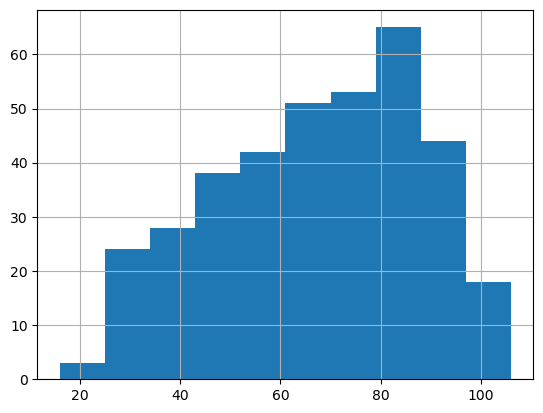

In [18]:
weather_data_clieaning.max_temp.hist() # хистограма не в matplotlib

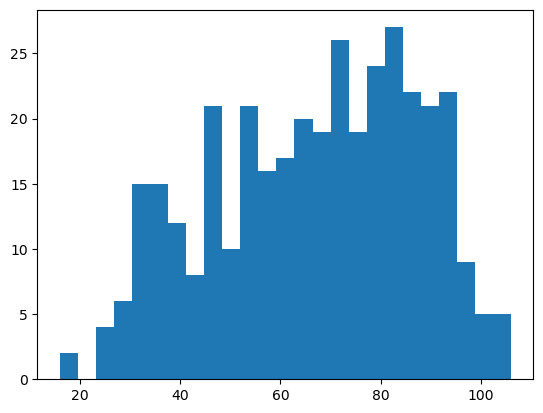

In [19]:
plt.hist(weather_data_clieaning.max_temp, bins = 25)
plt.show()

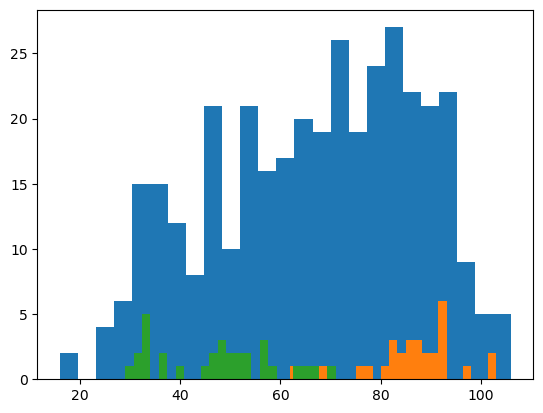

In [20]:
plt.hist(weather_data_clieaning.max_temp, bins = 25)
plt.hist(weather_data_clieaning[weather_data_clieaning.date.dt.month == 6].max_temp, bins = 25)
plt.hist(weather_data_clieaning[weather_data_clieaning.date.dt.month == 12].max_temp, bins = 25)
plt.show()

In [21]:
weather_data_clieaning = weather_data_clieaning.set_index("date") # задва се някоя от колоните за индекс

In [23]:
weather_data_clieaning.resample(pd.Timedelta(3, "day")).min_temp.mean() # resample функция за работта с дати, групира по дати, които са последователни, катп прескача групираните дати - двата метода дават средната промяна на по три дни

date
2012-03-10    35.666667
2012-03-13    50.666667
2012-03-16    52.333333
2012-03-19    58.000000
2012-03-22    52.666667
                ...    
2013-02-24    26.333333
2013-02-27    31.666667
2013-03-02    21.666667
2013-03-05    28.666667
2013-03-08    35.333333
Freq: 3D, Name: min_temp, Length: 122, dtype: float64

In [24]:
weather_data_clieaning.rolling(pd.Timedelta(3, "day")).min_temp.mean() # resample функция за работта с дати, групира по дати, които са последователни, като непрескача групираните дати - двата метода дават средната промяна на по три дни

date
2012-03-10    24.000000
2012-03-11    27.000000
2012-03-12    35.666667
2012-03-13    44.333333
2012-03-14    49.000000
                ...    
2013-03-06    25.666667
2013-03-07    28.666667
2013-03-08    26.666667
2013-03-09    28.000000
2013-03-10    35.333333
Name: min_temp, Length: 366, dtype: float64

липсващи данни може да има защото не трябва да са там
липсват защото е пропуск
има налични данни но сбъркани

трябва да се разбере от къде идва грешката и да се внимава с промяната защото това води до промяна на разпределението

1-начин с sentinel value - специална стойност която е много различна от другите и е видно че е амо за попълване на мястото - не трябва да се ползва
2 - ако стойността трябва да я има но липсва - може да се замени с някоя характерна стойност - напромер със метода fillna(kolona.mediana) - ако има малко рапределение средна стойност е удачен вариант.

**Outliers** аномалия е нещо което се случва рядко.
